In [10]:
%load_ext autoreload
%autoreload 2
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
from geomstats.geometry.pullback_metric import PullbackMetric
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def get_immersion(radius):
    def immersion(angle):
        return radius*gs.array([gs.cos(angle),gs.sin(angle)])
    return immersion


immersion = get_immersion(radius=10)

metric = PullbackMetric(dim=1, embedding_dim=2, immersion=immersion)

/Users/franciscoacosta/opt/anaconda3/envs/ng/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/Users/franciscoacosta/opt/anaconda3/envs/ng/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


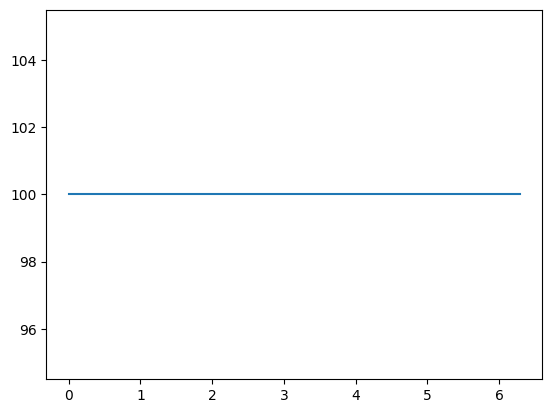

In [12]:
thetas = gs.linspace(0,2*gs.pi,100)

metrics = [metric.metric_matrix(gs.array([theta])) for theta in thetas]

plt.plot(thetas,metrics)

In [18]:
from datasets.synthetic import get_s1_synthetic_immersion

immersion = get_s1_synthetic_immersion(distortion_func="bump",radius=1,n_wiggles=None,distortion_amp=0.2,embedding_dim=2,rot=torch.eye(2))

metric = PullbackMetric(dim=1, embedding_dim=2, immersion=immersion)

thetas = gs.linspace(0,2*gs.pi,100)

metrics = [metric.metric_matrix(gs.array([theta])) for theta in thetas]

plt.plot(thetas,metrics)

RuntimeError: einsum(): the number of subscripts in the equation (1) does not match the number of dimensions (2) for operand 1 and no ellipsis was given